# 数据可视化(pandas篇) 
数据的可视化，是特征工程必不可少的。可以只管的揭示数据间的关系。  
python数据可视化的第三方库，有matplotlit，seaborn，pandas，除了展示各类图形API，希望能够阐述如何选择合适的图形来展示不同类型的数据。     
**需要具备一定pandas、matplotlit基础**

1、 pandas  

In [2]:
# 安装依赖库
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
# 设置matplotlib
%matplotlib inline

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [3]:
# 准备画图数据  

from sklearn.datasets import load_iris
data = load_iris()
X = data["data"]
y = data["target"]
columns = ["sepal_length","sepal_width","petal_length","petal_width"]
category = {0:'setosa', 1:'versicolor', 2:'virginica'}

import pandas as pd
X = pd.DataFrame(X, columns=columns)
y = pd.Series(y,name="category")
# print(X.head())
# print(y.head())
data = pd.concat([X,y],axis=1).reset_index(drop=True)
# data["category"] = data.category.map(category)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 查看数据基本信息，例如类型、有无缺失数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
category        150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


1.1 对于单变量的数据画图，也就是dataframe的一列数据

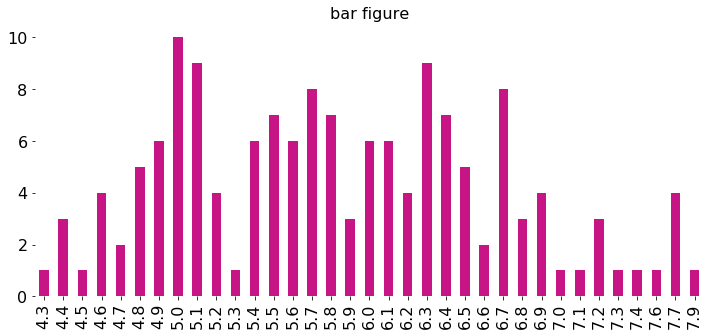

In [10]:
# 不恰当的展示方式，条状图不适用于表示连续/区间类型的数据
# 可以将图片调整为更优美的显示，例如：颜色、图标、大小等等，这里仅仅展示很小的一部分
import seaborn as sns
ax=data["sepal_length"].value_counts().sort_index().plot.bar(figsize=(12,5),color='mediumvioletred',fontsize=16)
ax.set_title("bar figure",fontsize=16)
sns.despine(bottom=True, left=True)

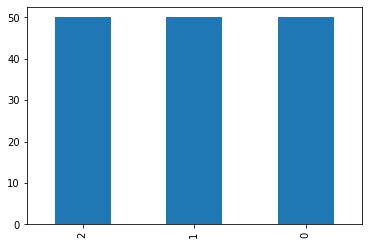

In [72]:
# 条状图适用于表示类别的数据，例如花朵类型,注意此处的value_counts，去掉看看效果
data["category"].value_counts().plot.bar()

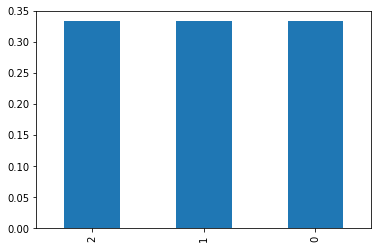

In [70]:
data["category"].value_counts(normalize=True).plot.bar()  # 纵坐标显示百分比

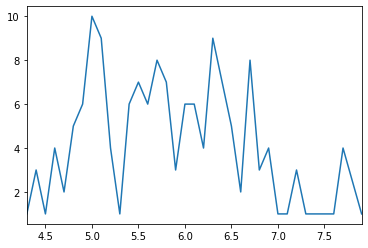

In [60]:
# 折线图/区域图适用于显示连续的数据，即区间数据
data["sepal_length"].value_counts().sort_index().plot.line()

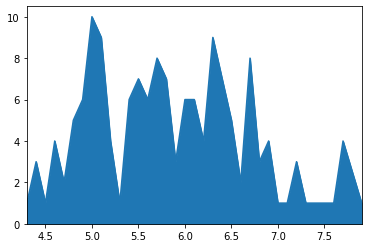

In [61]:
# 区域图使用场景类似折线图，只是进行了填充
data["sepal_length"].value_counts().sort_index().plot.area()

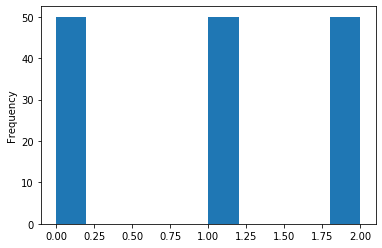

In [62]:
# 直方图也适用于类别数据  注意在画bar图时我们做了value_counts， 注意此时的横坐标
data["category"].plot.hist()

1.2 两个变量的数据  
对df两列画图，主要是为了挖掘他们之间关系，比如线性相关

In [73]:
# 输出列索引，方便画图
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'category'],
      dtype='object')

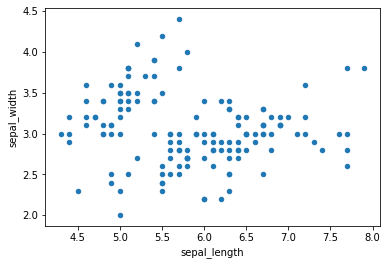

In [74]:
# 散点图
data.plot.scatter(x="sepal_length",y="sepal_width")

In [76]:
# 当数据点重叠特别多时，散点图不能够很好的反应数据，此时可以：
# 1. 对数据进行采样
# 2. 话hex图
# 制作符合重叠的数据

new_data = data
new_data["sepal_length"] = new_data["sepal_length"].round()
new_data["sepal_width"] = new_data["sepal_width"].round()
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width,category
0,5.0,4.0,1.4,0.2,0
1,5.0,3.0,1.4,0.2,0
2,5.0,3.0,1.3,0.2,0
3,5.0,3.0,1.5,0.2,0
4,5.0,4.0,1.4,0.2,0


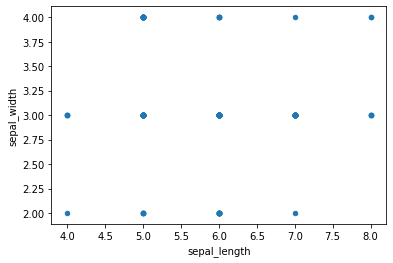

In [77]:
# 可以看到大部分数据都重叠了，看不出任何数据关系
new_data.plot.scatter(x="sepal_length",y="sepal_width")

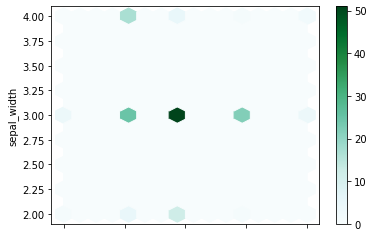

In [81]:
# 颜色深代表重叠数据多，可以看到在(5,3)处数据最多
new_data.plot.hexbin(x="sepal_length",y="sepal_width",gridsize=15)

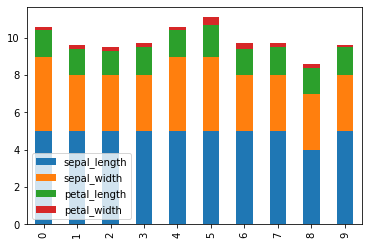

In [92]:
# 叠加条形图，如果每列代表的不同类型的数据，比如同一年的不同牌子红酒售价,即同一行数据间相加有意义。
# 此图例子不那么合适
# 但是可以看出，speal_length数据占据整个花朵总值大部分。
# 同时不适用数据量过多的场景
data[0:10].drop("category",axis=1).plot.bar(stacked=True)

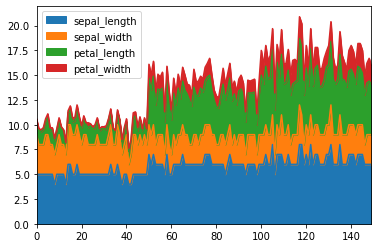

In [89]:
# 同理叠加区域图，能够好的观察出数据趋势, 对比条状图，区域图可以展示更多的数据量
data.drop("category",axis=1).plot.area()

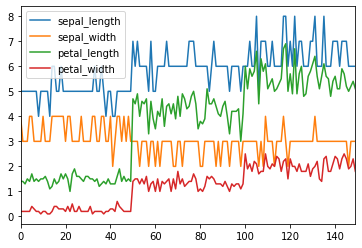

In [91]:
# 叠加折线图类似叠加区域图
data.drop("category",axis=1).plot.line()